# Projet Supply Chain - DS23

## 1. Rapport d'exploration, de data visualisation et de pre-processing des données

### 1.1 Collecte des données

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [39]:
df_ds=pd.read_csv('reviews_trust.csv')
df_ds.head(10)

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
5,"Commande passée pour une vente Lacoste , livra...",1,2021-06-19 00:00:00+00:00,Cyril CARABOT,"Bonjour Cyril , Je fais suite à votre message ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
6,Annulation de commande après 2 mois d ’ attent...,1,2021-06-18 00:00:00+00:00,aurore regnier,"Bonjour Aurore , Je suis sincèrement désolé d'...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
7,Extrêmement déçue de la vente Apple ! ! Achat ...,1,2021-06-18 00:00:00+00:00,Paola Perez,"Bonjour Paola , Je fais suite à votre message ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
8,Extrêmement deçu pour mes achats lors la vente...,1,2021-06-18 00:00:00+00:00,Ayna,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
9,S'il y'avait une option : ne pas mettre d'étoi...,1,2021-06-18 00:00:00+00:00,linda Ng,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


### 1.2 Exploration des données

In [40]:
print(df_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    19834 non-null  object 
 1   star           19863 non-null  int64  
 2   date           19488 non-null  object 
 3   client         10215 non-null  object 
 4   reponse        8477 non-null   object 
 5   source         19863 non-null  object 
 6   company        19863 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  6686 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB
None


In [43]:
# Nettoyage du jeu de données

df_ds = df_ds.dropna(axis = 0, how = 'any', subset = ['Commentaire','date']) 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


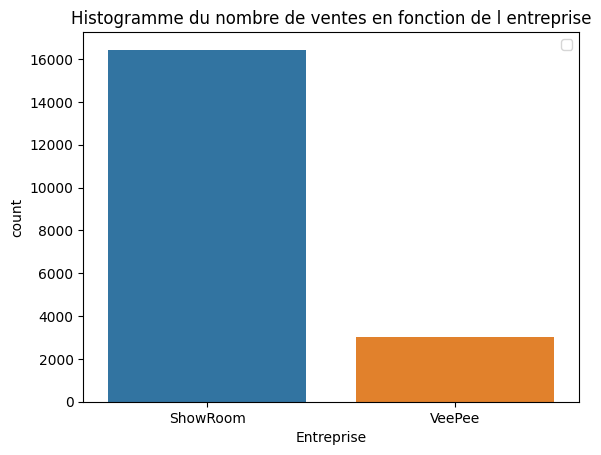

In [44]:
# Analyse de la distribution des données par entreprises

sns.countplot(x="company", data=df_ds);
plt.xlabel('Entreprise')
plt.legend()
plt.title('Histogramme du nombre de ventes en fonction de l entreprise');

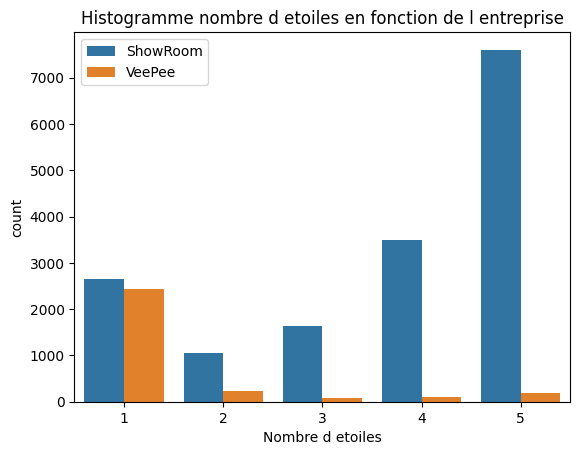

In [45]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="star", hue='company', data=df_ds)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme nombre d etoiles en fonction de l entreprise');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


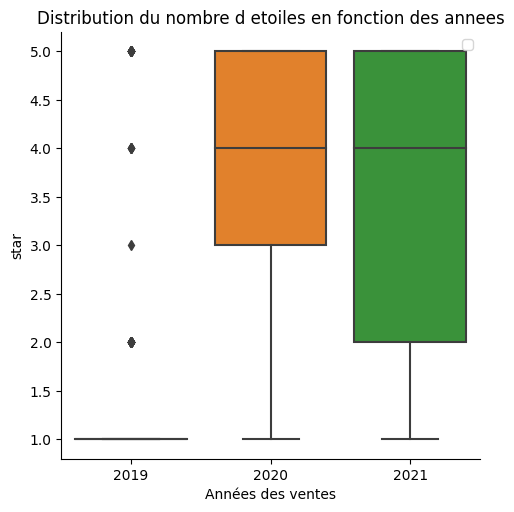

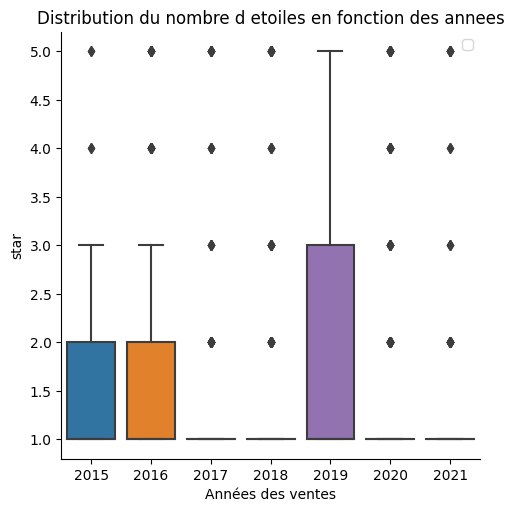

In [59]:
# Analyse de l'évolution du nombre d etoiles en fonction des années

# Création de la variable annee
df_ds["annee"] = df_ds["date"].str[:4].astype(int)

sns.catplot(data=df_ds[df_ds['company'] == 'ShowRoom'], x='annee', y='star', kind='box');
plt.xlabel('Années des ventes')
plt.legend()
plt.title('Distribution du nombre d etoiles en fonction des annees');

sns.catplot(data=df_ds[df_ds['company'] == 'VeePee'], x='annee', y='star', kind='box');
plt.xlabel('Années des ventes')
plt.legend()
plt.title('Distribution du nombre d etoiles en fonction des annees');

### 1.3 Exploitation des données